<a href="https://colab.research.google.com/github/SaraElizabethGarciaCajero/Proyecto-ASE-I/blob/main/Educaci%C3%B3nFemenina_ASE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#Importo librerías
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
%matplotlib inline     
sns.set(color_codes=True)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing

In [24]:
#Subo archivo que ocuparé
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving Educacion_05 (2).xlsx to Educacion_05 (2) (1).xlsx


In [13]:
#Leemos el archivo y lo guardamos en el dataFrame llamado df_Edu
df_Edu=pd.read_excel("Educacion_05 (2).xlsx", header=0)
df_Edu

,Entidad federativa,2010,2015,2020
0,Entidad federativa,Mujeres,Mujeres,Mujeres
1,Estados Unidos Mexicanos,8.48,9.01,9.64
2,Aguascalientes,9.17,9.64,10.32
3,Baja California,9.2,9.68,10.18
4,Baja California Sur,9.42,9.89,10.4
5,Campeche,8.32,8.94,9.52
6,Coahuila de Zaragoza,9.37,9.78,10.36
7,Colima,8.95,9.52,10.1
8,Chiapas,6.28,6.92,7.5
9,Chihuahua,8.83,9.45,10.02


In [14]:
#Elimino datos NaN
df_Edu.drop(df_Edu.index[34:49], inplace=True)
df_Edu

,Entidad federativa,2010,2015,2020
0,Entidad federativa,Mujeres,Mujeres,Mujeres
1,Estados Unidos Mexicanos,8.48,9.01,9.64
2,Aguascalientes,9.17,9.64,10.32
3,Baja California,9.2,9.68,10.18
4,Baja California Sur,9.42,9.89,10.4
5,Campeche,8.32,8.94,9.52
6,Coahuila de Zaragoza,9.37,9.78,10.36
7,Colima,8.95,9.52,10.1
8,Chiapas,6.28,6.92,7.5
9,Chihuahua,8.83,9.45,10.02


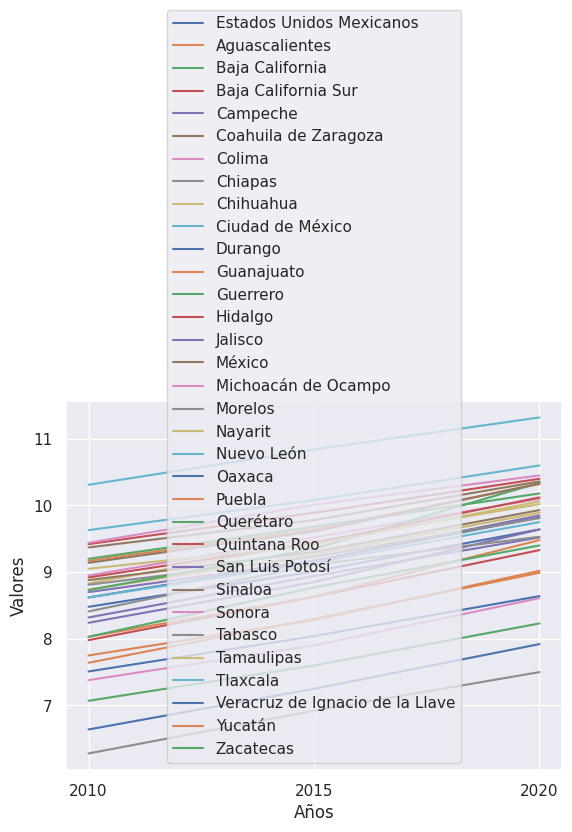

In [15]:
#Evolución a través de los tiempos

# Seleccionamos los datos de interés
datos = df_Edu.iloc[1:,1:].astype(float)
entidades = df_Edu.iloc[1:,0]

# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Agregamos las líneas
ax.plot(datos.T)

# Configuramos los ejes
ax.set_xlabel('Años')
ax.set_ylabel('Valores')
ax.set_xticks(range(len(datos.columns)))
ax.set_xticklabels(datos.columns)

# Agregamos la leyenda
ax.legend(entidades)

# Mostramos el gráfico
plt.show()


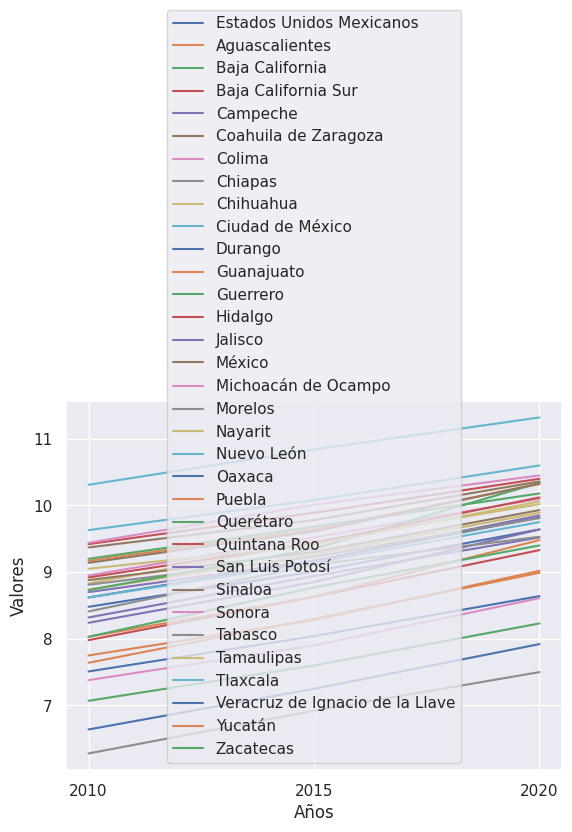

In [16]:
# Seleccionamos los datos de interés (solo 2010, 2015 y 2020)
datos = df_Edu.iloc[1:, [1, 2, 3]].astype(float)
entidades = df_Edu.iloc[1:, 0]

# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Agregamos las líneas
ax.plot(datos.T)

# Configuramos los ejes
ax.set_xlabel('Años')
ax.set_ylabel('Valores')
ax.set_xticks(range(len(datos.columns)))
ax.set_xticklabels(datos.columns)

# Agregamos la leyenda
ax.legend(entidades)

# Mostramos el gráfico
plt.show()

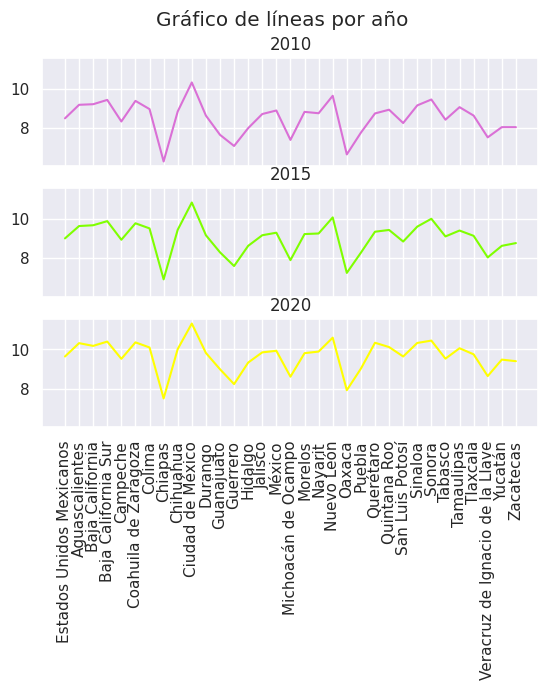

In [23]:
import matplotlib.pyplot as plt

# Seleccionamos los datos de interés
datos_2010 = df_Edu.iloc[1:, 1].astype(float)
datos_2015 = df_Edu.iloc[1:, 2].astype(float)
datos_2020 = df_Edu.iloc[1:, 3].astype(float)
entidades = df_Edu.iloc[1:, 0]

# Creamos la figura y los ejes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)

# Graficamos cada año en su respectivo eje
ax1.plot(entidades, datos_2010, color = "orchid")
ax1.set_title('2010')
ax2.plot(entidades, datos_2015, color = "chartreuse")
ax2.set_title('2015')
ax3.plot(entidades, datos_2020, color = "yellow")
ax3.set_title('2020')

# Configuramos los ejes
fig.suptitle('Gráfico de líneas por año')
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.show()


In [25]:
#Correlación entre el estado con más embarazos y su relación con: pobreza, pobreza extrema y educación 
#Estado: Chihuahua
#Subo archivo que ocuparé
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving Agrupamiento_Chihuahua.xlsx to Agrupamiento_Chihuahua.xlsx


In [29]:
Chihuahua_Correlacion=Chihuahua_Correlacion.drop(['Estado'], axis=1)

NameError: ignored

In [26]:
#Leemos el archivo y lo guardamos en el dataFrame llamado df_Edu
df_Corr=pd.read_excel("Agrupamiento_Chihuahua.xlsx", header=0)
df_Corr

,Estado,Año,Embarazo,Pobreza,Pobreza Extrema,Educación
0,Chihuahua,2010,18.8,28.544146,6.560855,8.48
1,Chihuahua,2015,18.2,27.486100,4.600000,9.01
2,Chihuahua,2020,15.1,32.604471,2.900000,9.64


In [27]:
Grafica= df_Corr["Estado"]=="Chihuahua"
Grafica1=df_Corr[Grafica]


In [28]:
Chihuahua_Corr=Grafica1

In [30]:
Frames=[Chihuahua_Corr, Grafica1]
BCS_Correlacion=pd.concat(Frames)

In [33]:
encoder=LabelEncoder()
df_Corr['Estado']=encoder.fit_transform(df_Corr['Estado'])

In [34]:
df_Corr=df_Corr.drop(['Estado'], axis=1)

In [35]:
df_Corr.corr()

,Año,Embarazo,Pobreza,Pobreza Extrema,Educación
Año,1.000000,-0.931623,0.751367,-0.999155,0.998764
Embarazo,-0.931623,1.000000,-0.939811,0.915897,-0.948537
Pobreza,0.751367,-0.939811,1.000000,-0.723608,0.783241
Pobreza Extrema,-0.999155,0.915897,-0.723608,1.000000,-0.995876
Educación,0.998764,-0.948537,0.783241,-0.995876,1.000000


<Axes: >

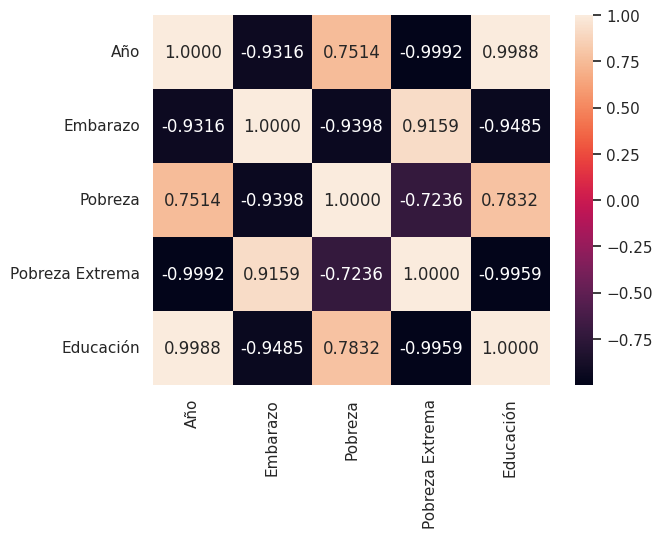

In [36]:
sns.heatmap(df_Corr.corr(), annot=True, fmt='.4f')